# WINE QUALITY 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [68]:
wine=pd.read_csv('WineQT.csv')

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
# number of rows & columns in the dataset
wine.shape

(1143, 13)

In [11]:
# first 5 rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
# checking for missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#Data Analysis and Visulaization


In [13]:
# statistical measures of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


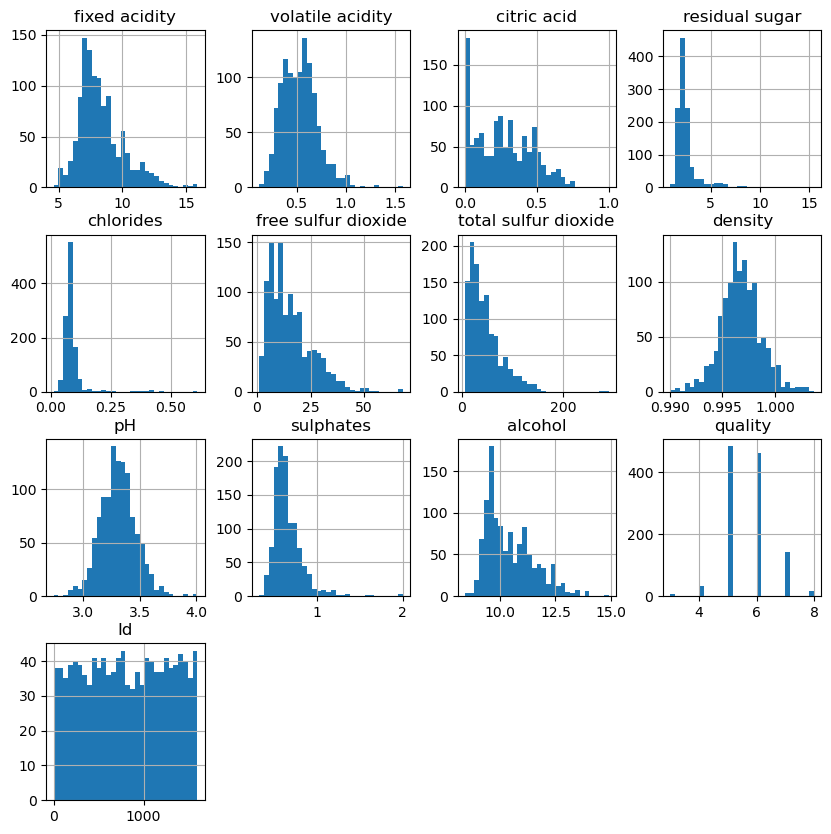

In [69]:
# Chemical Qualities:

wine.hist(bins=30, figsize=(10,10))
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

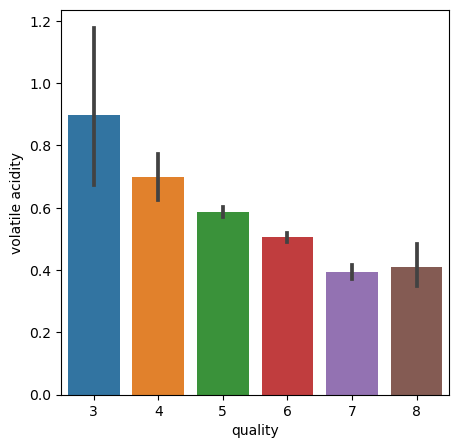

In [15]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

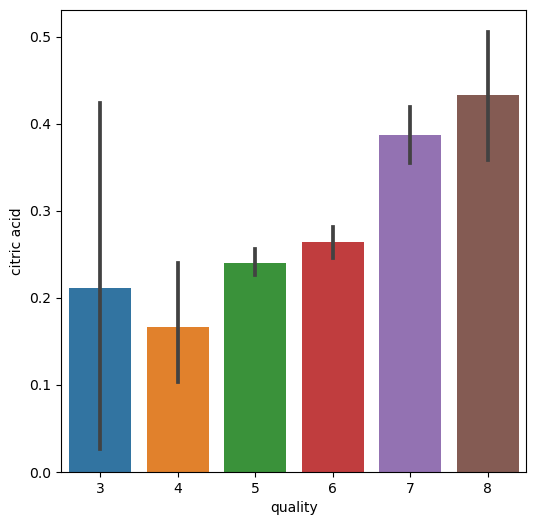

In [16]:
# citric acid vs Quality
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality', y = 'citric acid', data = wine)

In [17]:
correlation = wine.corr()

<Axes: >

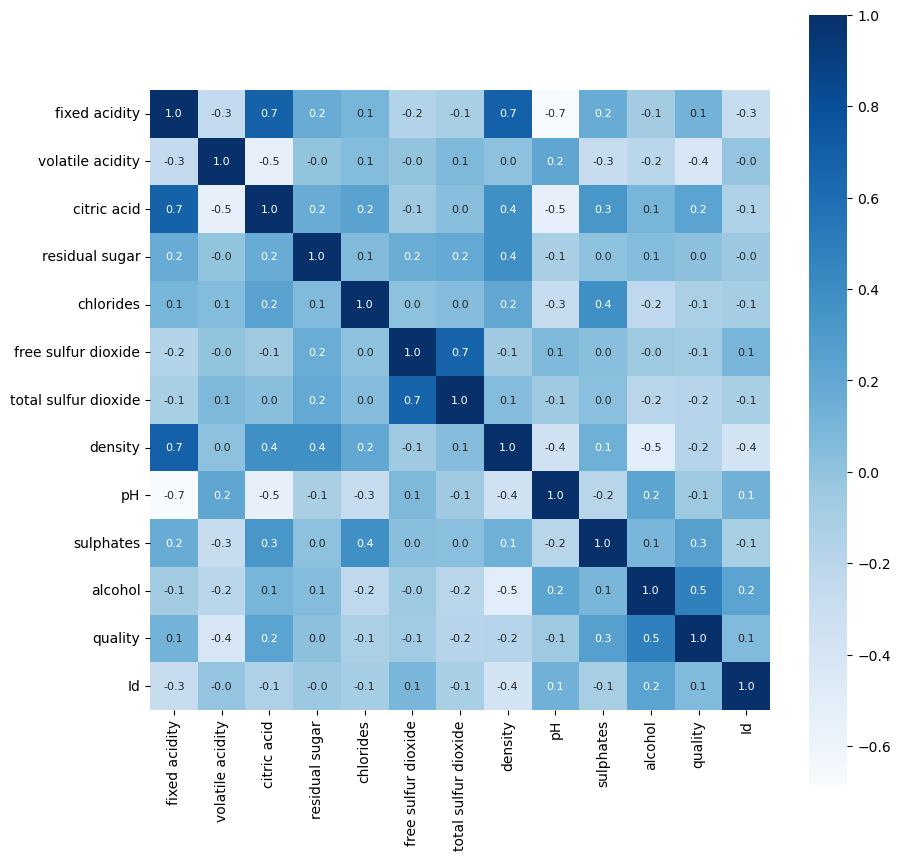

In [22]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

# Data Preprocessing

In [23]:
# separate the data and Label
X = wine.drop('quality',axis=1)

In [24]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

# Label Binarizaton

In [ ]:
Y = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [29]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


# Train & Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [31]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


# Model Training:
Random Forest Classifier

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9082969432314411


# Building a Predictive System

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

7.9 is the median value for -- fixed acidity


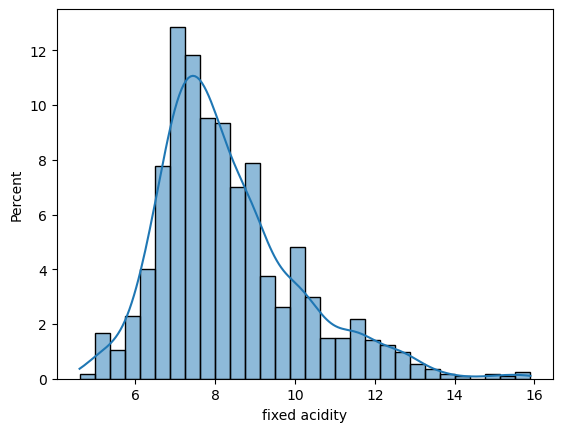

0.52 is the median value for -- volatile acidity


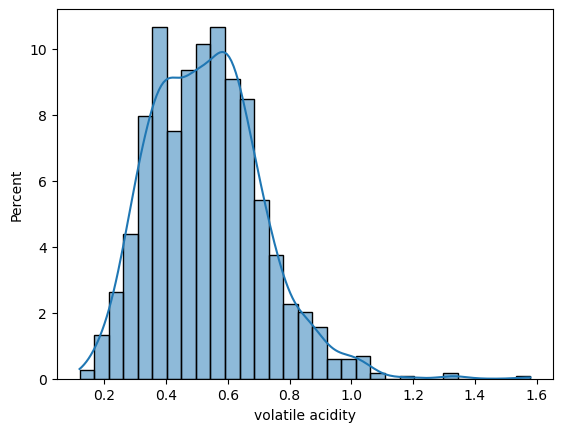

0.25 is the median value for -- citric acid


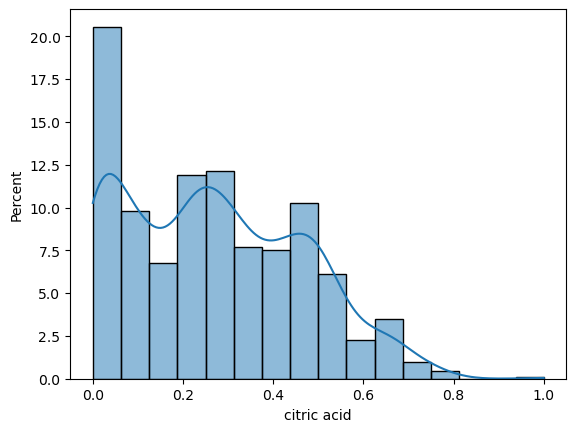

2.2 is the median value for -- residual sugar


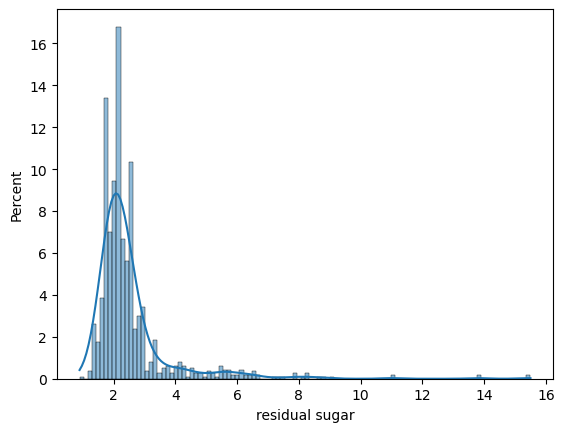

0.079 is the median value for -- chlorides


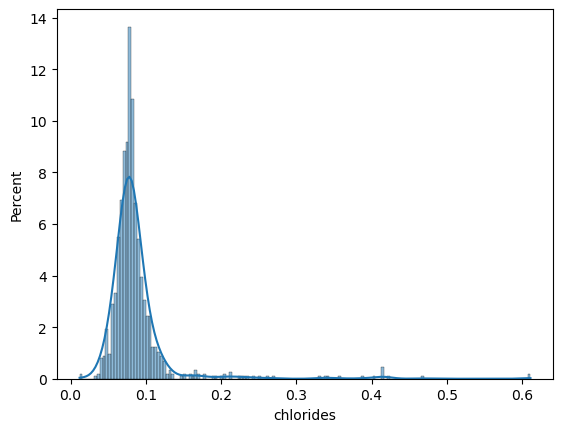

13.0 is the median value for -- free sulfur dioxide


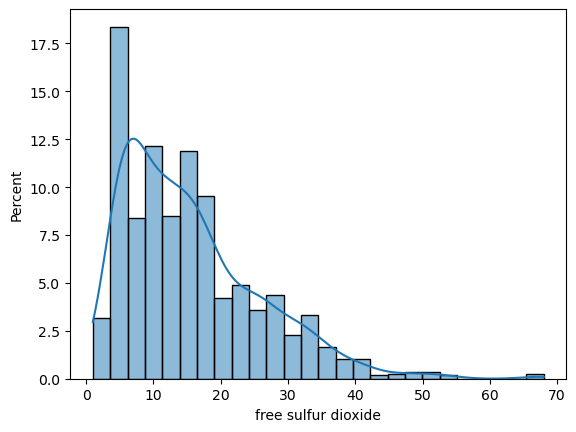

37.0 is the median value for -- total sulfur dioxide


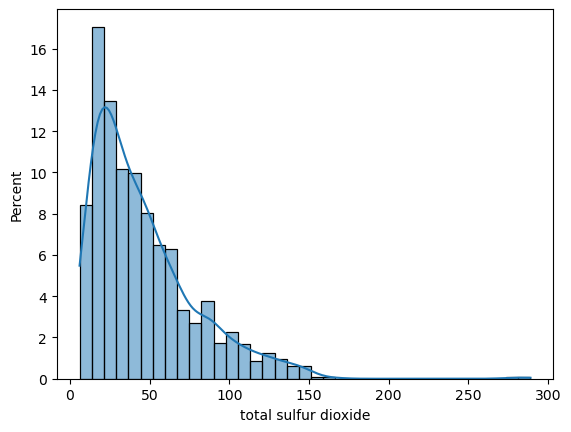

0.99668 is the median value for -- density


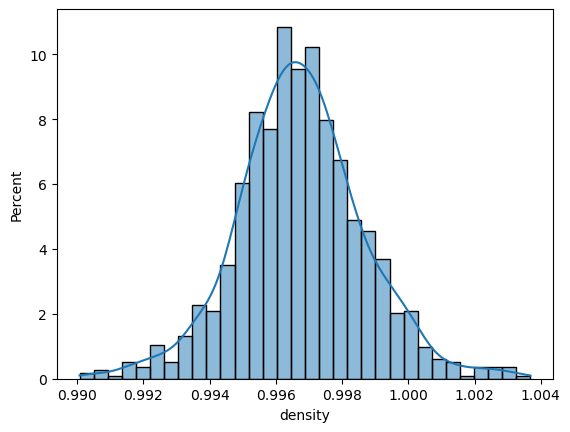

3.31 is the median value for -- pH


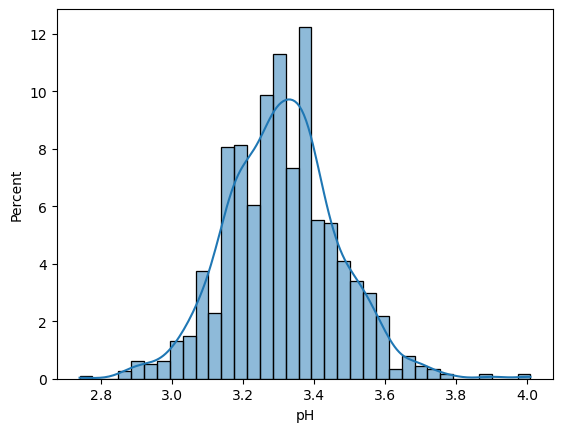

0.62 is the median value for -- sulphates


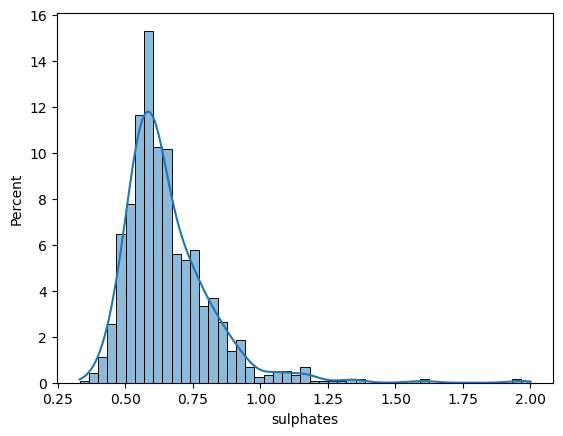

10.2 is the median value for -- alcohol


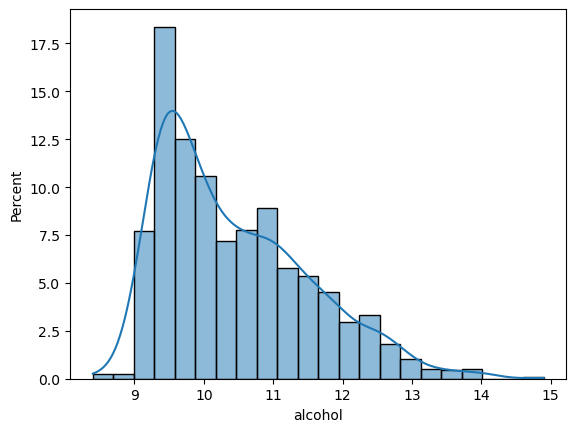

6.0 is the median value for -- quality


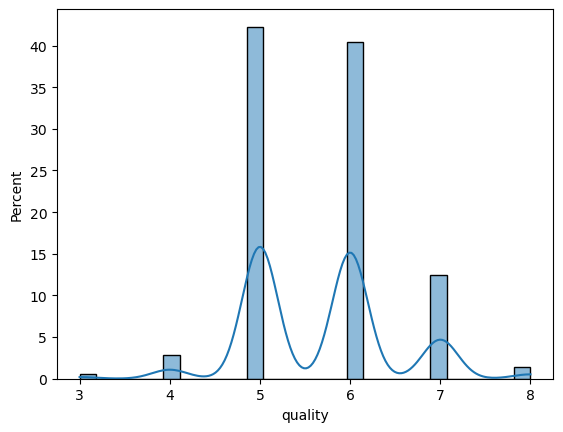

794.0 is the median value for -- Id


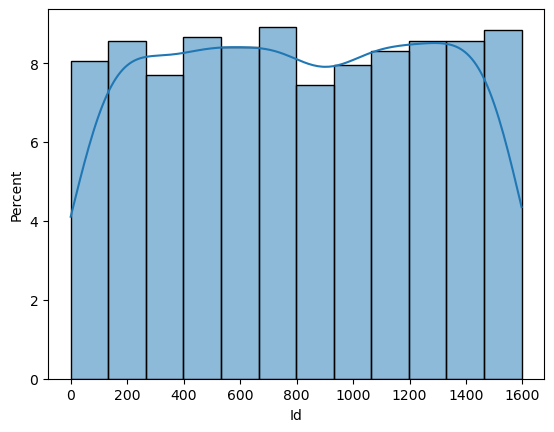

In [49]:
# histograms
for column in wine.columns:
        print(f"{np.median(wine[column])} is the median value for -- {column}") 

        sns.histplot(data=wine, x=column, stat='percent',kde=True)
        plt.show()


In [51]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [52]:
X= wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = wine[['quality']]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Model Selection and Training

# support vector machine

In [55]:
from sklearn.svm import SVC

In [56]:
model = SVC()

In [57]:
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [58]:
SVC()

SVC()

In [59]:
model.score(x_test, y_test)

0.5189504373177842

In [61]:
predict = model.predict(x_test)
predict

array([6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,

9. Model Evaluation

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.5189504373177842

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.44      0.53       144
           6       0.46      0.85      0.60       136
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         3

    accuracy                           0.52       343
   macro avg       0.19      0.21      0.19       343
weighted avg       0.46      0.52      0.46       343



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
cm

array([[  0,   0,   0,   2,   0,   0],
       [  0,   0,   4,   7,   0,   0],
       [  0,   0,  63,  81,   0,   0],
       [  0,   0,  21, 115,   0,   0],
       [  0,   0,   6,  41,   0,   0],
       [  0,   0,   1,   2,   0,   0]], dtype=int64)

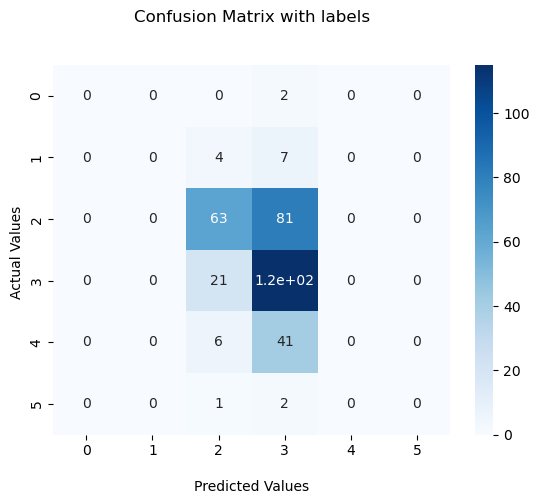

In [65]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

# Conclusion

In [67]:
In this Project,I have build classification model using Wine Quality Dataset.
A Build Model help of Support Vector Classifier Then feature scaling, visualized and evaluation through classification report, confusion matrix the performance of the models.  

SyntaxError: invalid syntax (911871316.py, line 1)

In [ ]:
Wine Quality prediction 
Developed by Sumit Kumar Chaurasia
